In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
import sys 
import time

In [2]:
input = cv2.imread('./images/input.jpg')
# plt.imshow(input)
# plt.title("HI LAALA")
# plt.show()
cv2.imshow("Hello LAALA", input)
cv2.waitKey()
cv2.destroyAllWindows()

In [3]:
print(f"width : {input.shape[0]}\nheight: {input.shape[1]}")

width : 415
height: 622


# Grayscaling Image
Grayscaling is the process by which an image is converted from a full color to shades of grey(Black and white)

In Opencv , many functions grayscaling before processing because it amplifies the image which acts as a noise reduction and increasing the processing time as there is less information in the image!!

In [4]:
img = cv2.imread("./images/Hillary.jpg")
grey_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2.imshow("COLOR HILLARY",img)
cv2.imshow("GRAY HILLARY",grey_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

##### We can use 0 here just to reduce the code but then we have to comment out the grayscaled image as it will pop up an error if we are to gray the already grayed picture 

In [5]:
img = cv2.imread("./images/Hillary.jpg",0)
# grey_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2.imshow("COLOR HILLARY",img)
cv2.imshow("GRAY HILLARY",grey_img)

cv2.waitKey()
cv2.destroyAllWindows()

#### First thing to remember about OpenCV's RGB is thats its BGR(I know its bit annoying what I am gonna do !)

In [6]:
img = cv2.imread('images/input.jpg')

In [7]:
B , G , R = img[10,50]
print(B,G,R)
img.shape

12 19 34


(415, 622, 3)

In [8]:
gray_img = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
B , G , R = img[10,50]
print(B , G , R)
gray_img.shape

12 19 34


(415, 622)

# HSV(Hue Saturation Value )
It is very useful in color filtering

In [9]:
image = cv2.imread("images/input.jpg")
hue_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
cv2.imshow("HSV Image ", hue_img)
cv2.imshow("Hue Channel", hue_img[:,:,0])
cv2.imshow("Saturation Channel", hue_img[:,:,1])
cv2.imshow("Value Channel", hue_img[:,:,2])
cv2.imshow("IMAGE",image)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Let's now look at the individual channels in an RGB image 

In [10]:
img = cv2.imread('images/input.jpg')
b,g, r  = cv2.split(img)
print(img.shape)
cv2.imshow('Red',r)
cv2.imshow('Green', g)
cv2.imshow('Blue',b)

merged_img  = cv2.merge([b,g+100,r]) # tincture of green
cv2.imshow('Merged Image',merged_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

(415, 622, 3)


In [11]:
img = cv2.imread('images/input.jpg')
b,g,r = cv2.split(img)
zeros = np.zeros(img.shape[:2],dtype = 'uint8')
# only single channel colors
cv2.imshow('RED',cv2.merge([zeros,zeros,r]))
cv2.imshow('Green',cv2.merge([zeros,g,zeros]))
cv2.imshow('Blue' ,cv2.merge([b,zeros,zeros]))

cv2.waitKey(0)
cv2.destroyAllWindows()

## Histograms are great way to visualize individual color components

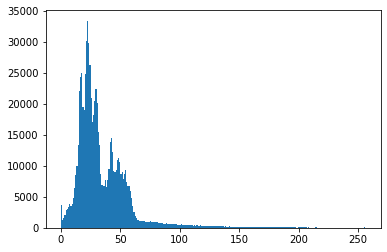

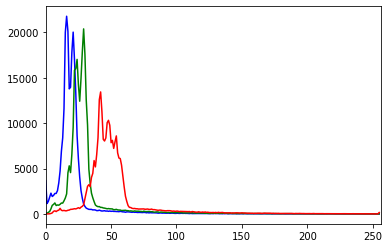

In [12]:
img = cv2.imread('images/input.jpg')
histogram  = cv2.calcHist([img],[0], None, [256] , [0,256])

plt.hist(img.ravel(),256,[0,256]); plt.show()
color= ("b","g","r")

for i , col in enumerate(color):
    histogram2 =  histogram  = cv2.calcHist([img],[i], None, [256] , [0,256])
    plt.plot(histogram2 , color = col)
    plt.xlim([0,256])

plt.show()

## Drawing images using OpenCv 

cv2.line(img, starting_points, ending_points, color, thickness)

In [13]:
black_box = np.zeros((512,512,3),np.uint8)
cv2.line(black_box,(0,0),(511,511),(123,43,0),3)
cv2.imshow("LINE", black_box)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.rectangle(image, starting vertex , opposite vertex, color,thickness(filler in negative))

In [14]:
black_box = np.zeros((512,512,3),np.uint8)
cv2.rectangle(black_box,(100,100) , (300,200),(123,43,50),-3)
cv2.imshow("RECTANGLE", black_box)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.circle(img, center, radius, color,fill)

In [15]:
black_box = np.zeros((512,512,3),np.uint8)
cv2.circle(black_box,(350,350),100 ,(10,70,145),-1)
cv2.imshow("CIRCLE", black_box)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Translations


In [16]:
image = cv2.imread('images/input.jpg')
height,width = image.shape[:2]
quarter_height,quarter_width = height/4,width/4

T = np.float32([[1,0,quarter_height],[0,1,quarter_width]])
img_transation = cv2.warpAffine(image, T, (width,height))
cv2.imshow('Translation', img_transation)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Rotaion 

In [17]:
image = cv2.imread('images/input.jpg')
height,width = image.shape[:2]
half_height,half_width = height/2,width/2

rotation_matrix = cv2.getRotationMatrix2D((half_width,half_height),90,0.5)
img_rotation = cv2.warpAffine(image, rotation_matrix, (width,height))
cv2.imshow('Rotation', img_rotation)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
image = cv2.imread('images/input.jpg')
rotated_img = cv2.transpose(image)
r=cv2.transpose(rotated_img)
cv2.imshow("Rotated Image ", rotated_img)
cv2.imshow("R ", r)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Scaling , Re-sizing , Interpolations

In [19]:
img = cv2.imread("images/input.jpg")

img_scaled = cv2.resize(img, None , fx=0.75 , fy = 0.75)
cv2.imshow("Scaling - Linear Interpolation", img_scaled)
cv2.waitKey()

# Doubling the size of  our image
img_scaled = cv2.resize(img, None , fx=2 , fy =2 , interpolation = cv2.INTER_CUBIC)
cv2.imshow("Scaling - Cubic Interpolation", img_scaled)
cv2.waitKey()

# Lets skew the re-sizing by setting exact dimensions
img_scaled = cv2.resize(img, (900,400) , interpolation = cv2.INTER_AREA)
cv2.imshow("Scaling - Skewed Size ", img_scaled)
cv2.waitKey()

cv2.destroyAllWindows()

### Image pyramids 


In [20]:
smaller = cv2.pyrDown(img)
larger  =cv2.pyrUp(img)

cv2.imshow("Image shrinked",smaller)
cv2.imshow("Image Zoomed",larger)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Cropping Image

In [21]:
img = cv2.imread('images/input.jpg')
height, width = img.shape[:2]
start_row,start_col = int(height *0.25),int(width * 0.25)
end_row,end_col = int(height * 0.75), int(width* 0.75)

cropped = img[start_row:end_row, start_col:end_col]
cv2.imshow("cropped Image",cropped)
cv2.waitKey(0)
cv2.imshow("original",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Arithmetic Operations 
For Brightness and Darkness

In [22]:
image = cv2.imread("images/input.jpg")
M = np.ones(image.shape ,dtype='uint8')*75

added = cv2.add(image, M)
cv2.imshow("Added",added)
cv2.waitKey(0)

subtract = cv2.subtract(image, M)
cv2.imshow("Subtracted",subtract)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Bitwise operations and Masking 

In [23]:
# Making a sqare
square = np.zeros((300, 300), np.uint8)
cv2.rectangle(square, (50, 50), (250, 250), 255, -2)
cv2.imshow("Square", square)
cv2.waitKey(0)

# Making a ellipse
ellipse = np.zeros((300, 300), np.uint8)
cv2.ellipse(ellipse, (150, 150), (150, 150), 30, 0, 180, 255, -1)
cv2.imshow("Ellipse", ellipse)
cv2.waitKey(0)

cv2.destroyAllWindows()

### Experimenting with some Bitwise Operations

In [24]:
# Shows only where they intersect
And = cv2.bitwise_and(square, ellipse)
cv2.imshow("AND", And)
cv2.waitKey(0)

# Shows where either square or ellipse is 
bitwiseOr = cv2.bitwise_or(square, ellipse)
cv2.imshow("OR", bitwiseOr)
cv2.waitKey(0) 

# Shows where either exist by itself
bitwiseXor = cv2.bitwise_xor(square, ellipse)
cv2.imshow("XOR", bitwiseXor)
cv2.waitKey(0)

# Shows everything that isn't part of the square
bitwiseNot_sq = cv2.bitwise_not(square)
cv2.imshow("NOT - square", bitwiseNot_sq)
cv2.waitKey(0)

### Notice the last operation inverts the image totally

cv2.destroyAllWindows()

In [25]:
from IPython.display import Image

## Convolution and Blurring
convolution is basically a mathematical operations performed on two functions which produces third function, which is basically modification of original function.(Tough let me make easy)
o/p image = image * func_kernel
basically ,in Computer Vision we  use kernels to specify the size over which we run our manipulating function over our image.(hope this helps if don't then feel free to ask)

# Blurring
It is basically an operation which is used to average the pixels with in the region
cv2.filter2D(image,-1,kernel)

![Some Basic Concepts ](images/Selection_001.png)


In [26]:
image = cv2.imread("images/elephant.jpg")
cv2.imshow("original",image)
cv2.waitKey(0)

kernel = np.ones((3,3),np.float32) / 9
blurred = cv2.filter2D(image,-1,kernel)
cv2.imshow("Blurred Image(3X3)", blurred)
cv2.waitKey(0)

kernel = np.ones((7,7), np.float32) / 49
blurred2 = cv2.filter2D(image,-1,kernel)
cv2.imshow("Blurred Image (7 X 7)", blurred2)
cv2.waitKey(0)

# Averaging done by convolving the image with a normalized box filter. 
# This takes the pixels under the box and replaces the central element
# Box size needs to odd and positive 
blur = cv2.blur(image, (3,3))
cv2.imshow('Averaging', blur)
cv2.waitKey(0)

# Instead of box filter, gaussian kernel
Gaussian = cv2.GaussianBlur(image, (7,7), 0)
cv2.imshow('Gaussian Blurring', Gaussian)
cv2.waitKey(0)

# Takes median of all the pixels under kernel area and central 
# element is replaced with this median value
median = cv2.medianBlur(image, 5)
cv2.imshow('Median Blurring', median)
cv2.waitKey(0)

# Bilateral is very effective in noise removal while keeping edges sharp
bilateral = cv2.bilateralFilter(image, 9, 75, 75)
cv2.imshow('Bilateral Blurring', bilateral)
cv2.waitKey(0)
cv2.destroyAllWindows()


cv2.destroyAllWindows()


## Image De-noising - Non-Local Means Denoising
**There are 4 variations of Non-Local Means Denoising:**

- cv2.fastNlMeansDenoising() - works with a single grayscale images
- cv2.fastNlMeansDenoisingColored() - works with a color image.
- cv2.fastNlMeansDenoisingMulti() - works with image sequence captured in short period of time (grayscale images)
- cv2.fastNlMeansDenoisingColoredMulti() - same as above, but for color images.

In [27]:
image = cv2.imread('images/elephant.jpg')

# Parameters, after None are - the filter strength 'h' (5-10 is a good range)
# Next is hForColorComponents, set as same value as h again
# 
dst = cv2.fastNlMeansDenoisingColored(image, None, 6, 6, 7, 21)

cv2.imshow('Fast Means Denoising', dst)
cv2.waitKey(0)

cv2.destroyAllWindows()

## Sharpening 
![Sharpening](images/Selection_002.png)

In [28]:
image = cv2.imread('images/input.jpg')
cv2.imshow('original',image)


kernel_sharpening = np.array([ [-1,-1,-1],
                             [-1,9,-1],
                             [-1,-1,-1] ])
sharpened =cv2.filter2D(image, -1,kernel_sharpening)
cv2.imshow("image Sharpening",sharpened)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [29]:
kernel_sharpening = np.array([ [-4,-4,-4],
                             [-4,28,-4],
                             [-4,-4,-4] ])
sharpened =cv2.filter2D(image, -1,kernel_sharpening)
cv2.imshow("image Sharpening",sharpened)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Thresholding, Binarization and Adaptive Thresholding 
**Images are first needed to be converted into grayscale then we apply thresholding**


In [30]:
# Load our image as greyscale 
image = cv2.imread('images/gradient.jpg',0)
cv2.imshow('Original', image)

# Values below 127 goes to 0 (black, everything above goes to 255 (white)
ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
cv2.imshow('1 Threshold Binary', thresh1)

# Values below 127 go to 255 and values above 127 go to 0 (reverse of above)
ret,thresh2 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
cv2.imshow('2 Threshold Binary Inverse', thresh2)

# Values above 127 are truncated (held) at 127 (the 255 argument is unused)
ret,thresh3 = cv2.threshold(image, 127, 255, cv2.THRESH_TRUNC)
cv2.imshow('3 THRESH TRUNC', thresh3)

# Values below 127 go to 0, above 127 are unchanged  
ret,thresh4 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO)
cv2.imshow('4 THRESH TOZERO', thresh4)

# Resever of above, below 127 is unchanged, above 127 goes to 0
ret,thresh5 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO_INV)
cv2.imshow('5 THRESH TOZERO INV', thresh5)
cv2.waitKey(0) 
    
cv2.destroyAllWindows()

## Adaptive Thresholding
**Simple threshold methods require us to provide the threshold value whereas adaptive threshold methods take that uncertainity away**

-- Whenever there are some changes in light intensity we can use Adaptive methods

In [31]:
# Load our new image
image = cv2.imread('images/Origin_of_Species.jpg', 0)

cv2.imshow('Original', image)
cv2.waitKey(0) 

# Values below 127 goes to 0 (black, everything above goes to 255 (white)
ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
cv2.imshow('Threshold Binary', thresh1)
cv2.waitKey(0) 

# It's good practice to blur images as it removes noise
image = cv2.GaussianBlur(image, (3, 3), 0)

# Using adaptiveThreshold
thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                               cv2.THRESH_BINARY, 3, 5) 
cv2.imshow("Adaptive Mean Thresholding", thresh) 
cv2.waitKey(0) 

_, th2 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2.imshow("Otsu's Thresholding", th2) 
cv2.waitKey(0) 

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(image, (5,5), 0)
_, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2.imshow("Guassian Otsu's Thresholding", th3) 
cv2.waitKey(0) 

cv2.destroyAllWindows()

## Dilation and Erosion

- Dilation : Adds pixels to the boundaries of objects in an image
- Erosion : Removes pixels at the boundaries of objects in an image
- Opening : Erosion followed by Dilation(really helpful in removing noise from img)
- Closing : Dilation followed by Erosion 
### There are some other less popular morphology operations, see the official OpenCV site:

http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html

NOTE: When working on an image which is black test on white background the relation    looks opposite(don't worry I am here Lol!) but its just a false misconception actually in dilation its thickening the white thats why it seems like the the text eroding. Run it if you find any prob go to link shown above!:)

- Although in images you can find both the images for fun

In [32]:
img = cv2.imread("images/opencv_inv.png",0)
cv2.imshow('Original',img)
cv2.waitKey(0)

kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
cv2.imshow('Erosion', erosion)
cv2.waitKey(0)

dilation = cv2.dilate(img,kernel,iterations=1)
cv2.imshow("Dilation",dilation)
cv2.waitKey(0)


# OPENING
opening = cv2.morphologyEx(img,cv2.MORPH_OPEN , kernel)
cv2.imshow('Opening',opening)
cv2.waitKey(0)

# Closing
closing = cv2.morphologyEx(img,cv2.MORPH_CLOSE,kernel)
cv2.imshow("Closing", closing)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Edge Detection & Image Gradients

In [33]:
image = cv2.imread('images/input.jpg',0)

height, width = image.shape

# Extract Sobel Edges
sobel_x = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)

cv2.imshow('Original', image)
cv2.waitKey(0)
cv2.imshow('Sobel X', sobel_x)
cv2.waitKey(0)
cv2.imshow('Sobel Y', sobel_y)
cv2.waitKey(0)

sobel_OR = cv2.bitwise_or(sobel_x, sobel_y)
cv2.imshow('sobel_OR', sobel_OR)
cv2.waitKey(0)

laplacian = cv2.Laplacian(image, cv2.CV_64F)
cv2.imshow('Laplacian', laplacian)
cv2.waitKey(0)


##  Then, we need to provide two values: threshold1 and threshold2. Any gradient value larger than threshold2
# is considered to be an edge. Any value below threshold1 is considered not to be an edge. 
#Values in between threshold1 and threshold2 are either classiﬁed as edges or non-edges based on how their 
#intensities are “connected”. In this case, any gradient values below 60 are considered non-edges
#whereas any values above 120 are considered edges.


# Canny Edge Detection uses gradient values as thresholds
# The first threshold gradient
canny = cv2.Canny(image, 50, 120)
cv2.imshow('Canny', canny)
cv2.waitKey(0)

cv2.destroyAllWindows()

## Getting Perspective Transform 

In [34]:
image = cv2.imread('images/scan.jpg')

cv2.imshow('Original', image)
cv2.waitKey(0)

# Cordinates of the 4 corners of the original image
points_A = np.float32([[320,15], [700,215], [85,610], [530,780]])

# Cordinates of the 4 corners of the desired output
# We use a ratio of an A4 Paper 1 : 1.41
points_B = np.float32([[0,0], [420,0], [0,594], [420,594]])
 
# Use the two sets of four points to compute 
# the Perspective Transformation matrix, M    
M = cv2.getPerspectiveTransform(points_A, points_B)
 
warped = cv2.warpPerspective(image, M, (420,594))
 
cv2.imshow('warpPerspective', warped)
cv2.waitKey(0)
cv2.destroyAllWindows()

## In Affine Transform we only need 3 Co-ordinates

In [35]:
image = cv2.imread('images/ex2.jpg')
rows,cols,ch = image.shape

cv2.imshow('Original', image)
cv2.waitKey(0)

# Cordinates of the 4 corners of the original image
points_A = np.float32([[320,15], [700,215], [85,610]])

# Cordinates of the 4 corners of the desired output
# We use a ratio of an A4 Paper 1 : 1.41
points_B = np.float32([[0,0], [420,0], [0,594]])
 
# Use the two sets of four points to compute 
# the Perspective Transformation matrix, M    
M = cv2.getAffineTransform(points_A, points_B)

warped = cv2.warpAffine(image, M, (cols, rows))
 
cv2.imshow('warpPerspective', warped)
cv2.waitKey(0)
cv2.destroyAllWindows()